In [1]:
# import global packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import astropy.io.fits as pyfits
from astropy.table import Table, join, Column
from astropy.wcs import WCS
from astropy.io import ascii
import os

# import local packages
import sys
sys.path.append('./Python')
from ReturnMapData import returnMapData

# set plotting specifics
sns.set_theme(style="ticks")


In [2]:
# Compile galaxy and sne data
data = Table.read('../Data/1.GroupedSampleData.csv', format='csv')

data[0:1]

col0,galaxy,distance,gal_ra,gal_dec,pos_ang,incl,nat_res,r_eff,maps_musedap,maps_nat,maps_150,maps_1kpc,maps_HII,maps_irac,maps_CO21,maps_eCO21,maps_ext,maps_vdisp,maps_HST,JWST200,JWST300,JWST335,JWST360,JWST770,JWST1000,JWST1130,JWST2100,sn_name,sn_type,sn_ra,sn_dec
int64,str7,float64,float64,float64,float64,float64,float64,float64,str71,str58,str64,str63,str50,str40,str72,str73,str36,str32,str45,str93,str93,str93,str93,str93,str94,str94,str94,str82,str50,str127,str132
0,NGC1087,15.85,41.60492,-0.498717,359.1,42.9,0.92,42.091877,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1087-0.92asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1087_sfr.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1087_sfr_150pc.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1087_sfr_1kpc.fits,../Data/HII_reg_masks/NGC1087_nebulae_mask_V2.fits,../Data/IRAC/ngc1087_irac1_atGauss4.fits,../../GalaxyFiles/ALMACO2-1/ngc1087_12m+7m+tp_co21_150pc_broad_mom0.fits,../../GalaxyFiles/ALMACO2-1/ngc1087_12m+7m+tp_co21_150pc_broad_emom0.fits,../Data/SFR_v1/NGC1087_MAPS_sfr.fits,../Data/vdisp/ngc1087_vdisp.fits,../../GalaxyFiles/HST/ngc1087_hst_ha_sic.fits,../../GalaxyFiles/JWSTLargeFiles/Anchored_8.0_Gauss7.5/ngc1087_F200W_atGauss7p5_anchored.fits,../../GalaxyFiles/JWSTLargeFiles/Anchored_8.0_Gauss7.5/ngc1087_F300W_atGauss7p5_anchored.fits,../../GalaxyFiles/JWSTLargeFiles/Anchored_8.0_Gauss7.5/ngc1087_F330W_atGauss7p5_anchored.fits,../../GalaxyFiles/JWSTLargeFiles/Anchored_8.0_Gauss7.5/ngc1087_F365W_atGauss7p5_anchored.fits,../../GalaxyFiles/JWSTLargeFiles/Anchored_8.0_Gauss7.5/ngc1087_F770W_atGauss7p5_anchored.fits,../../GalaxyFiles/JWSTLargeFiles/Anchored_8.0_Gauss7.5/ngc1087_F1000W_atGauss7p5_anchored.fits,../../GalaxyFiles/JWSTLargeFiles/Anchored_8.0_Gauss7.5/ngc1087_F1130W_atGauss7p5_anchored.fits,../../GalaxyFiles/JWSTLargeFiles/Anchored_8.0_Gauss7.5/ngc1087_F2100W_atGauss7p5_anchored.fits,['SN1995V'],['II'],[41.61152777777777],[-0.4987861111111111]


In [3]:
# get extinction values at sn sites
int_ext = Table.read("../Data/1.sn_ints_exts.csv", format="csv")

int_ext[0:10]

Supernova,sn_type,int_nat,int_150,int_1kpc,a_v,c_o,e_co,co_snr,co,halpha_lws,gcr,gcr_reff,met_theory
str11,str5,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,float64
SN1995V,II,8.839672735197591e+39,9.098356574390131e+39,5.626363456901733e+39,1.2788075992834158,10.1257905960083,0.9063823223114014,11.17165470123291,Yes,52.49597118323195,0.14295581272079702,3.396280301797827,8.241260378874152
SN2022acko,II,3.445745101042276e+38,5.543860583782077e+38,7.868984950864679e+38,0.3049447396212661,-0.13982966542243958,0.7117888331413269,0.0,No,66.20645202360187,0.3791372256557472,5.349132803990211,8.194418508484775
SN2012fr,Ia,8.904660571183651e+37,9.61137910255348e+37,2.866850419201407e+38,0.0,-2.3060925006866455,0.9818917512893677,0.0,No,67.80803058745335,0.31117160065160954,16.537606327147618,8.611878787878789
SN2001du,II,1.3530435354080875e+39,1.8635576999760546e+39,4.641739419198077e+39,0.17916425772905134,2.8034262657165527,1.1442593336105347,2.4499919414520264,No,67.5783735181326,0.7901610432754345,41.99410306523355,8.528133333333333
SN1983V,SESNe,1.4845660990817182e+40,1.2147806235754843e+40,1.5745029644344602e+39,0.9452981371543961,5.302032947540283,0.9777513742446899,5.422679901123047,Yes,65.62497233234417,0.4849807653394629,25.77491312390853,8.581115151515151
SN1957C,Unc,2.938518960212585e+39,3.591077078009263e+39,4.5113659318499504e+39,0.3792970400406018,nan,nan,nan,No,63.37777764994122,0.8122435748346881,43.167706995891166,8.524145454545454
SN1985P,II,2.4790371281538853e+38,2.5539187987566293e+38,3.5918628424433485e+38,0.23807412216935414,0.1435399204492569,0.43370234966278076,0.3309641182422638,No,66.72808300207814,0.35099411508780515,7.365811758336993,8.473244447141619
SN2021aefx,Ia,1.263977781860364e+38,1.6517725129681728e+38,2.6011293280284877e+38,0.0,0.47932836413383484,0.4722742438316345,1.0149364471435547,No,73.48439047715426,0.3543751559931149,9.585917905115721,8.258321037510719
SN2010el,Ia,3.8272402829093126e+38,7.612922852139554e+38,4.093381793956729e+39,0.2583469600901398,15.370909690856934,1.139516830444336,13.488970756530762,Yes,68.4384120218828,0.12515317762001707,3.385418153447413,8.487739528322445


In [4]:
# get HII region information at sn sites
hii = Table.read("../Data/1.sn_hii_dists.csv", format="csv")

hii[0:1]
int_ext["sn_type"]

II
II
Ia
II
SESNe
Unc
II
Ia
Ia
...
II


<Axes: ylabel='Count'>

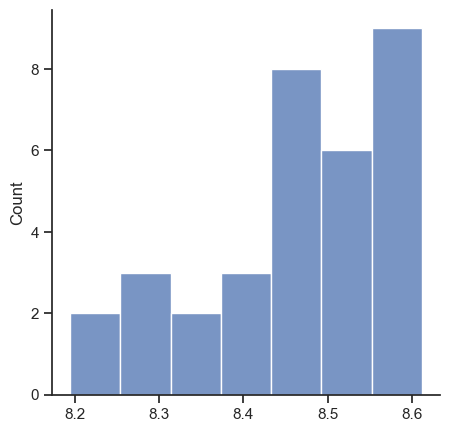

In [5]:
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f)

sns.histplot(int_ext["met_theory"]) 
#              hue="sn_type")
#              multiple="dodge",
#              bins=8,
#              palette="rocket",
#              edgecolor=".3",
#              kde=True,
#              linewidth=.5)

# plt.vlines(x=0.39, ymin=0, ymax=9, color="black", linestyle="--")
# plt.vlines(x=0.79, ymin=0, ymax=9, color="purple", linestyle="--")
# plt.xlim(-0.15,2.5)
# ax.text(0.43, 6.5, r"average pixel $A_{V}$")
# ax.text(0.83, 4.5, r"average HII region $A_{V}$", color="purple")
# ax.text(0.14,9.5,"all map pixels", color="#1f77b4")
# ax.set_ylabel("Number of SNe")
# ax.set_xlabel(r"$A_{V}$ [mag]")
# plt.tight_layout()
# plt.savefig("../Figures/ExtinctionHist.png", dpi=300)
# plt.show()
# plt.close()

In [6]:
import pandas as pd
df = pd.read_csv("../Data/1.sn_ints_exts.csv")

/Users/nessmaykerchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


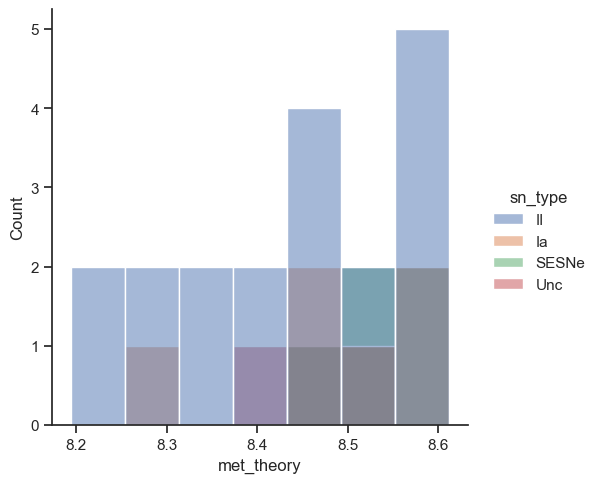

In [7]:
sns.displot(data=df, hue='sn_type',x='met_theory',
            kind="hist", legend=True)

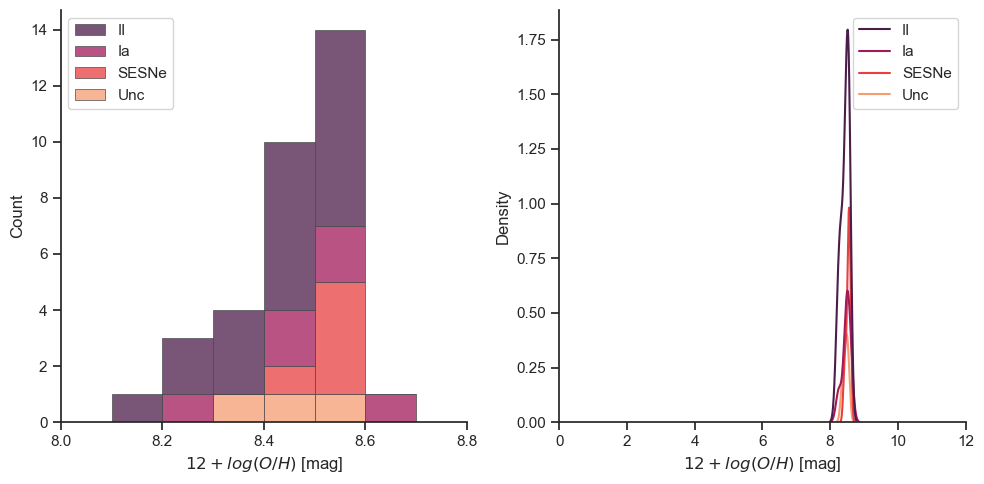

In [8]:
f= plt.figure(figsize=(10, 5))
ax1 = f.add_subplot(1,2,1)

sns.despine(f)

sns.histplot(x=df["met_theory"], 
             hue=df["sn_type"],
             multiple="stack",
             bins=[8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8],
             palette="rocket",
             edgecolor=".3",
#              kde=True,
             linewidth=.5,
            ax=ax1)
ax1.set_xlim(8,8.8)
ax1.set_xlabel(r"$12 + log(O/H)$ [mag]")
ax1.legend_.set_title(None)

ax2 = f.add_subplot(1,2,2)

sns.despine(f)
sns.kdeplot(x=df["met_theory"], 
             hue=df["sn_type"],
             palette="rocket", ax=ax2)
ax2.set_xlabel(r"$12 + log(O/H)$ [mag]")
ax2.set_xlim(0,12)
ax2.legend_.set_title(None)



plt.tight_layout()
plt.savefig("../Figures/Metallicities.png", dpi=300)
plt.show()
plt.close()

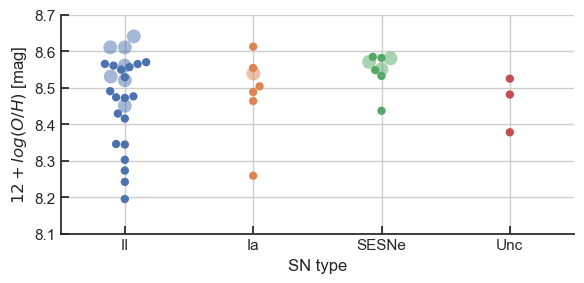

In [14]:
Types = ["II","II","II","Ia","II","II","II","SESNe","SESNe","II","SESNe"]
Mets = [8.61, 8.56, 8.52, 8.54, 8.45, 8.64, 8.53, 8.55, 8.58, 8.61, 8.57]

f = plt.figure(figsize=(6,3))
sns.despine(f)
sns.swarmplot(data=df, x="sn_type",y='met_theory', hue="sn_type", legend=False, size = 6,edgecolor="white")
sns.swarmplot(x=Types,y=Mets, hue=Types, legend=False, size = 10,alpha = 0.5,edgecolor="white")
plt.ylim(8.1,8.7)
plt.grid()
plt.tick_params(axis = "both", direction="in")
plt.xlabel("SN type")
sns.despine(f)

plt.ylabel(r"$12 + log(O/H)$ [mag]")
plt.tight_layout()
plt.savefig("../Figures/MetallicitiesSwarm.png", dpi=300)
plt.show()
plt.close()